In [31]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state



In [32]:

def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

In [55]:
X,y=make_regression()

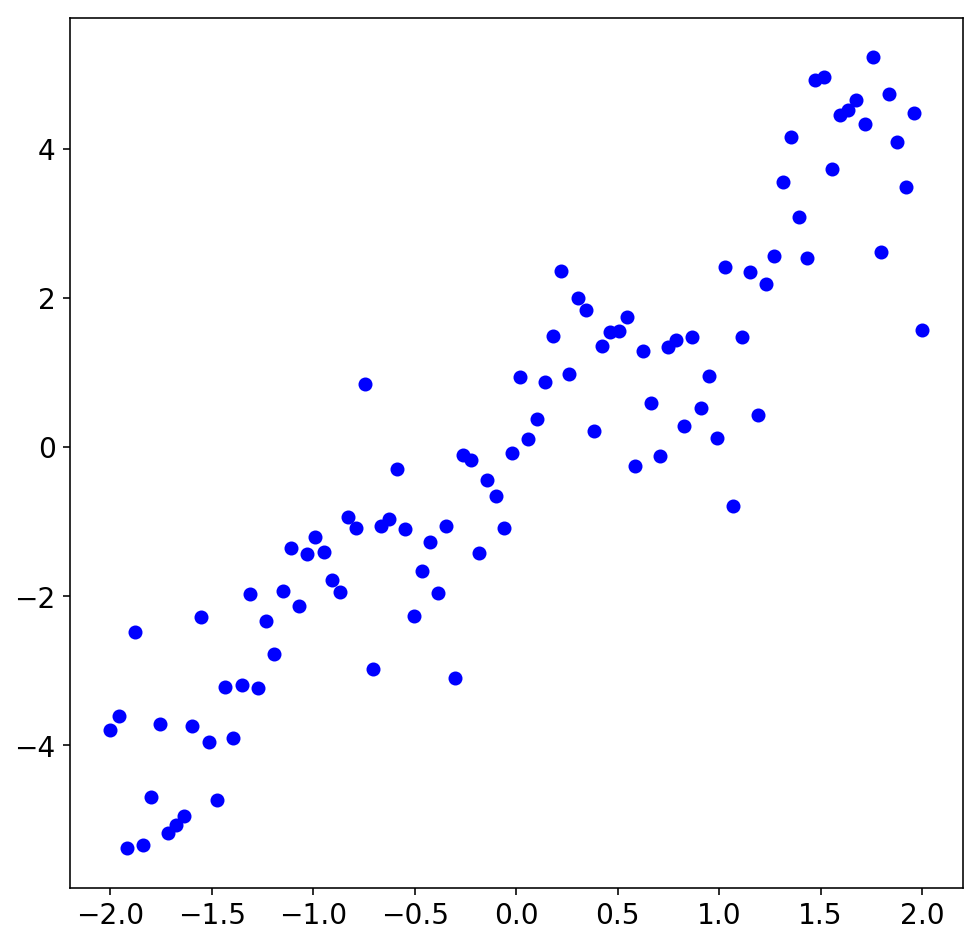

In [56]:
plt.plot(X, y, 'ob')

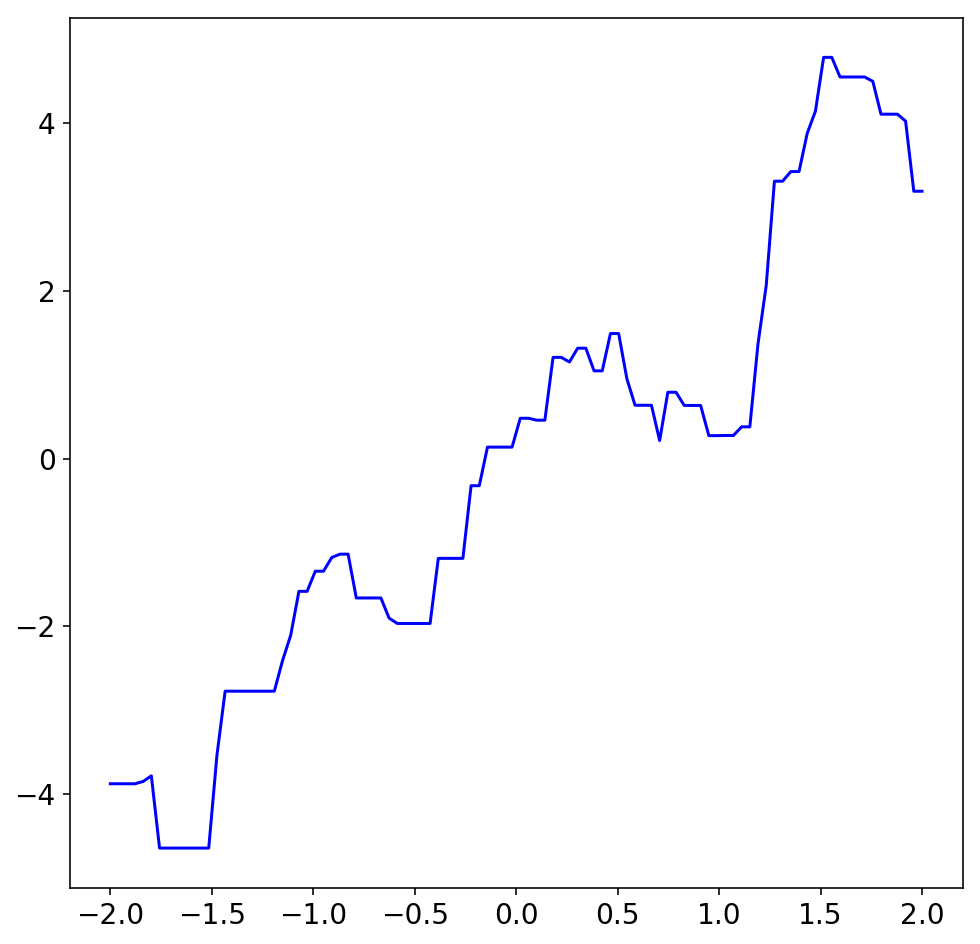

In [57]:
#from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

#clf = KNeighborsClassifier()
#clf.fit(X_train, y_train)
line = np.linspace(-2, 2, 100).reshape(-1, 1)
from sklearn.neighbors import KNeighborsRegressor
rgr = KNeighborsRegressor(n_neighbors=3)
rgr.fit(X_train, y_train)
plt.plot(line, rgr.predict(line), '-b')

In [58]:
from sklearn.metrics import mean_squared_error

print('MSE train:', mean_squared_error(y_train, rgr.predict(X_train)))
print('MSE test:', mean_squared_error(y_test, rgr.predict(X_test)))

MSE train: 0.504128346853
MSE test: 1.03508544825


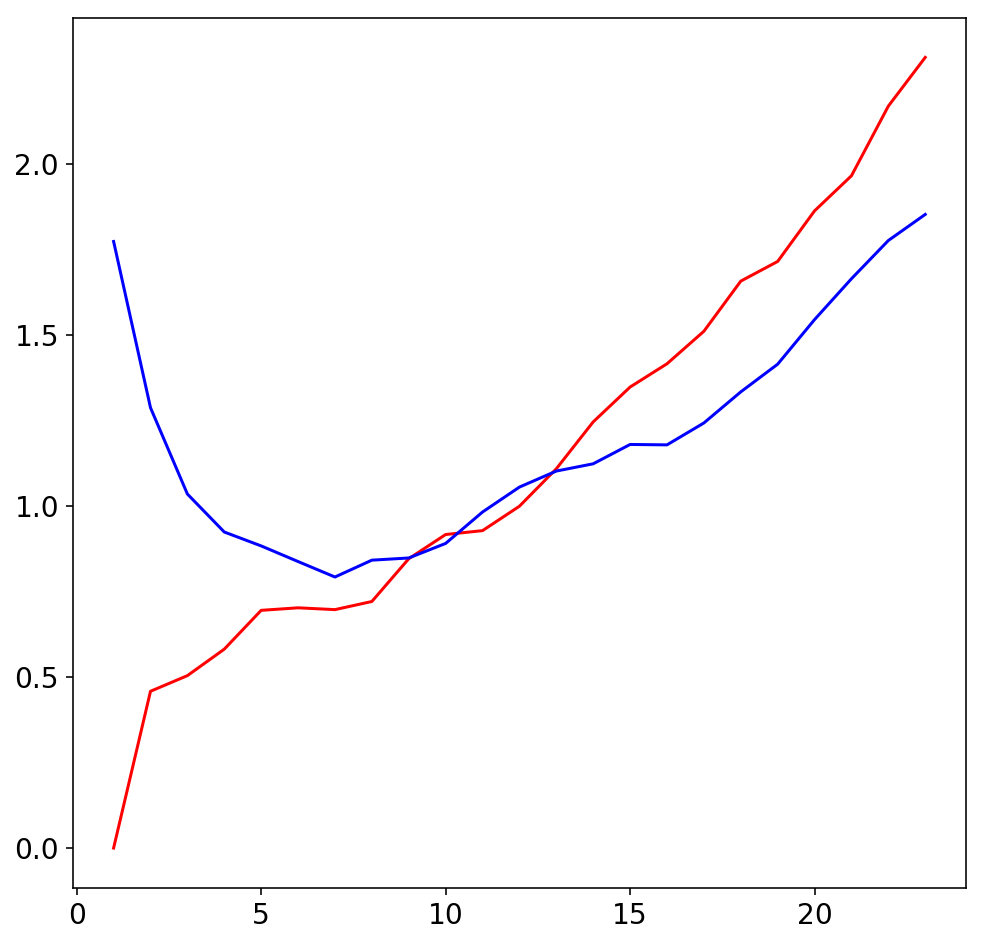

In [59]:
train_scores = []
test_scores = [] 
for k in range(1,24):
    rgr = KNeighborsRegressor(n_neighbors=k)
    rgr.fit(X_train, y_train)
    train_scores.append(mean_squared_error(y_train, rgr.predict(X_train)))
    test_scores.append(mean_squared_error(y_test, rgr.predict(X_test)))

plt.plot(range(1,24), train_scores, '-r')
plt.plot(range(1,24), test_scores, '-b')

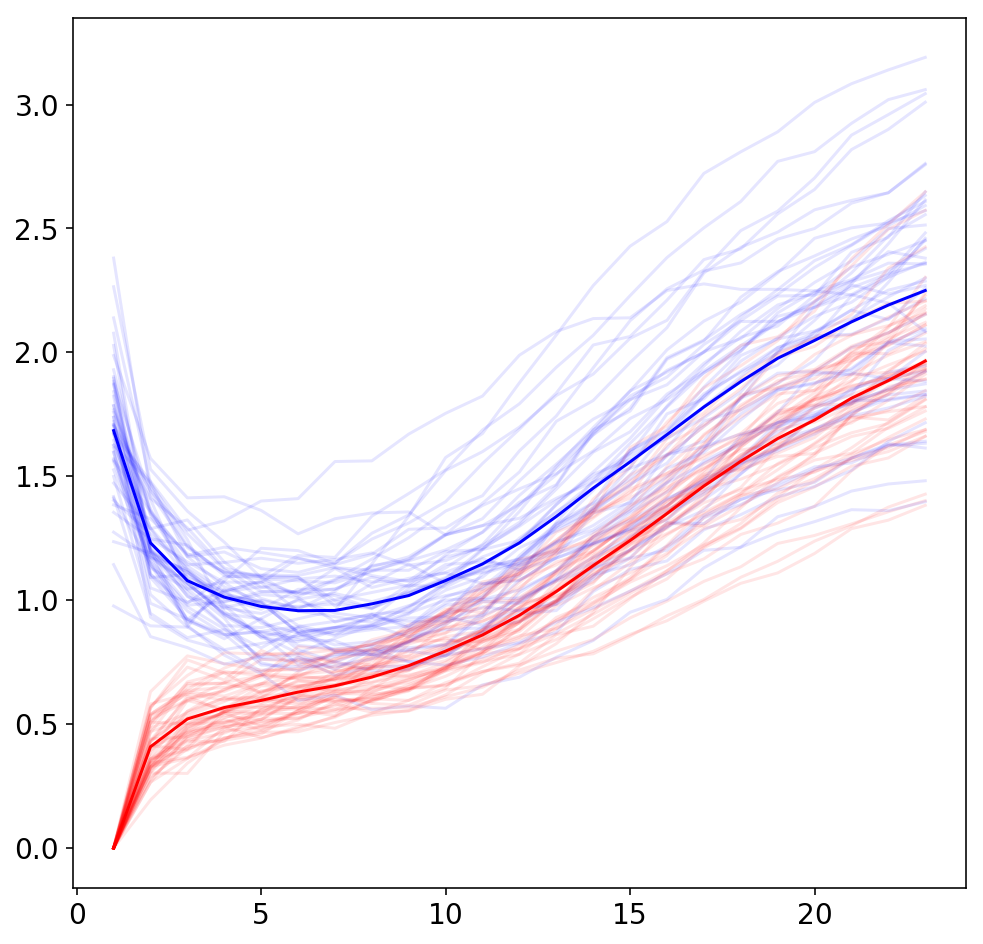

In [61]:
acc_test = []
acc_train = []
for n in range(50):
    #create data
    X,y=make_regression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores= []
    for k in range(1,24):
        rgr = KNeighborsRegressor(n_neighbors=k)
        rgr.fit(X_train, y_train)
        train_scores.append(mean_squared_error(y_train, rgr.predict(X_train)))
        test_scores.append(mean_squared_error(y_test, rgr.predict(X_test)))
        acc_test.append(test_scores)
        acc_train.append(train_scores)

    plt.plot(range(1,24), train_scores, '-r', alpha=0.1)
    plt.plot(range(1,24), test_scores, '-b', alpha=0.1)

ks = range(1,24)
plt.plot(ks, np.array(acc_test).mean(axis=0), '-b')
plt.plot(ks, np.array(acc_train).mean(axis=0), '-r')

Similar to exercise 1, we can see that the model is always better at replicating in sample data than forcasting. When n is very small, the model uses few data for a given location. It is therefore very good in sample (MSE is 0!). However, the model is over fitted and has no predicting power. When n increase, the model looses fit in sample but improve outsample. MSE is minimized for k between 5 and 7.